Cleaning Data

In [160]:
# Import necessary libraries
import pandas as pd
import re

In [161]:

# Step 1: Load the dataset
file_path = "sentiment.csv"  # Path to your CSV file
df = pd.read_csv(file_path)

In [162]:
df.shape

(500, 4)

In [163]:

# Step 2: Display the first few rows of the data (optional, for inspection)
df.head()

,id,title,body,notification_priority
0,1,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,1
1,2,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
2,3,चीन फाइनल खेलको तयारी,ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,0
3,4,चीन सम्बन्धमा नयाँ मस्यौदा,नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
4,5,एआई ले नयाँ उपकरण सार्वजनिक गर्‍यो,ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,0


In [164]:

# Step 3: Remove duplicate rows based on all columns
df = df.drop_duplicates()
print("\nData after removing duplicates:")
df.head()


Data after removing duplicates:


,id,title,body,notification_priority
0,1,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,1
1,2,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
2,3,चीन फाइनल खेलको तयारी,ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,0
3,4,चीन सम्बन्धमा नयाँ मस्यौदा,नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
4,5,एआई ले नयाँ उपकरण सार्वजनिक गर्‍यो,ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,0


In [165]:
df.shape

(500, 4)

In [ ]:

df = df.dropna(subset=['title', 'body'])
df.head()

,id,title,body,notification_priority
0,1,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,1
1,2,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
2,3,चीन फाइनल खेलको तयारी,ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,0
3,4,चीन सम्बन्धमा नयाँ मस्यौदा,नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
4,5,एआई ले नयाँ उपकरण सार्वजनिक गर्‍यो,ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,0


In [167]:
df.shape

(500, 4)

In [168]:

# Step 5: Standardize the text
def clean_text(text):
    """
    Function to clean and standardize text by:
    - Removing special characters, numbers, and extra spaces
    - Ensuring consistent formatting
    """
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r"[^a-zA-Z\u0900-\u097F\s]", "", text)  # Retain Nepali and English alphabets
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

In [169]:

# Apply the cleaning function to both `title` and `body` columns
df['title'] = df['title'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)



In [170]:
df.head()

,id,title,body,notification_priority
0,1,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,1
1,2,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
2,3,चीन फाइनल खेलको तयारी,ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,0
3,4,चीन सम्बन्धमा नयाँ मस्यौदा,नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1
4,5,एआई ले नयाँ उपकरण सार्वजनिक गर्यो,ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,0


In [171]:
output_path = "cleaned_sentiment.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned data saved to {output_path}")


Cleaned data saved to cleaned_sentiment.csv


Tokenization

In [172]:
# Import necessary libraries
from indicnlp.tokenize import indic_tokenize

# Load the cleaned dataset
file_path = "cleaned_sentiment.csv"  # Path to the cleaned CSV file
df = pd.read_csv(file_path)

# Function to tokenize Nepali text
def tokenize_text(text):
    """
    Tokenizes Nepali text using the Indic NLP Library.
    """
    tokens = list(indic_tokenize.trivial_tokenize(text, lang="ne"))  # 'ne' is the language code for Nepali
    return tokens

# Apply tokenization to the 'title' and 'body' columns
df['title_tokens'] = df['title'].apply(tokenize_text)
df['body_tokens'] = df['body'].apply(tokenize_text)

# Display the tokenized data
df[['title', 'title_tokens', 'body', 'body_tokens']].head()


,title,title_tokens,body,body_tokens
0,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,"[फाइभजी, मा, प्रधानमन्त्रीको, नयाँ, कदम]",नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,"[नेपाल, को, भ्रमणले, आर्थिक, विकासको, नयाँ, ढो..."
1,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,"[नेपाल, मा, प्रधानमन्त्रीको, नयाँ, कदम]",क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,"[क्रिकेट, को, निर्णयले, व्यापक, प्रतिक्रिया, ल..."
2,चीन फाइनल खेलको तयारी,"[चीन, फाइनल, खेलको, तयारी]",ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,"[ओलम्पिक, प्रतियोगितामा, नेपालको, ऐतिहासिक, प्..."
3,चीन सम्बन्धमा नयाँ मस्यौदा,"[चीन, सम्बन्धमा, नयाँ, मस्यौदा]",नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,"[नेपाल, को, निर्णयले, व्यापक, प्रतिक्रिया, ल्य..."
4,एआई ले नयाँ उपकरण सार्वजनिक गर्यो,"[एआई, ले, नयाँ, उपकरण, सार्वजनिक, गर्यो]",ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,"[ओलम्पिक, मा, एआई, प्रविधिको, प्रयोगले, सुधार,..."


In [173]:
# Save the tokenized data back to a new CSV file
output_path = "tokenized_sentiment.csv"
df.to_csv(output_path, index=False)
print(f"\nTokenized data saved to {output_path}")



Tokenized data saved to tokenized_sentiment.csv


Stopwords Removal

In [174]:
import advertools as adv
adv.stopwords.keys()

dict_keys(['arabic', 'azerbaijani', 'bengali', 'catalan', 'chinese', 'croatian', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hungarian', 'indonesian', 'irish', 'italian', 'japanese', 'kazakh', 'nepali', 'norwegian', 'persian', 'polish', 'portuguese', 'romanian', 'russian', 'sinhala', 'spanish', 'swedish', 'tagalog', 'tamil', 'tatar', 'telugu', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese'])

In [175]:
sorted(adv.stopwords['nepali'])[:5]

['अक्सर', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत']

In [176]:
import pandas as pd
from indicnlp.tokenize import indic_tokenize
import re

# Define a list of Nepali stopwords (customize this list or load from a file if needed)
nepali_stopwords = [
    adv.stopwords['nepali']
]

# Load the tokenized dataset
file_path = "tokenized_sentiment.csv"  # Path to the tokenized CSV file
df = pd.read_csv(file_path)

# Function to remove stopwords
def remove_stopwords(tokens):
    """
    Removes Nepali stopwords from a list of tokens.
    """
    if not isinstance(tokens, list):
        tokens = eval(tokens)  # Convert string to list if necessary
    filtered_tokens = [word for word in tokens if word not in nepali_stopwords]
    return filtered_tokens

# Apply stopword removal to the tokenized columns
df['title_tokens'] = df['title_tokens'].apply(remove_stopwords)
df['body_tokens'] = df['body_tokens'].apply(remove_stopwords)

# Save the data with stopwords removed into a new file
output_file = "stopwords.csv"
df.to_csv(output_file, index=False, encoding='utf-8')

# Display the first few rows of the modified data
print("\nData after stopword removal saved to 'stopwords.csv':")
print(df[['title_tokens', 'body_tokens']].head())


Data after stopword removal saved to 'stopwords.csv':
                               title_tokens  \
0  [फाइभजी, मा, प्रधानमन्त्रीको, नयाँ, कदम]   
1   [नेपाल, मा, प्रधानमन्त्रीको, नयाँ, कदम]   
2                [चीन, फाइनल, खेलको, तयारी]   
3           [चीन, सम्बन्धमा, नयाँ, मस्यौदा]   
4  [एआई, ले, नयाँ, उपकरण, सार्वजनिक, गर्यो]   

                                         body_tokens  
0  [नेपाल, को, भ्रमणले, आर्थिक, विकासको, नयाँ, ढो...  
1  [क्रिकेट, को, निर्णयले, व्यापक, प्रतिक्रिया, ल...  
2  [ओलम्पिक, प्रतियोगितामा, नेपालको, ऐतिहासिक, प्...  
3  [नेपाल, को, निर्णयले, व्यापक, प्रतिक्रिया, ल्य...  
4  [ओलम्पिक, मा, एआई, प्रविधिको, प्रयोगले, सुधार,...  


In [177]:
df.head()

,id,title,body,notification_priority,title_tokens,body_tokens
0,1,फाइभजी मा प्रधानमन्त्रीको नयाँ कदम,नेपाल को भ्रमणले आर्थिक विकासको नयाँ ढोका खोल्...,1,"[फाइभजी, मा, प्रधानमन्त्रीको, नयाँ, कदम]","[नेपाल, को, भ्रमणले, आर्थिक, विकासको, नयाँ, ढो..."
1,2,नेपाल मा प्रधानमन्त्रीको नयाँ कदम,क्रिकेट को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1,"[नेपाल, मा, प्रधानमन्त्रीको, नयाँ, कदम]","[क्रिकेट, को, निर्णयले, व्यापक, प्रतिक्रिया, ल..."
2,3,चीन फाइनल खेलको तयारी,ओलम्पिक प्रतियोगितामा नेपालको ऐतिहासिक प्रदर्शन।,0,"[चीन, फाइनल, खेलको, तयारी]","[ओलम्पिक, प्रतियोगितामा, नेपालको, ऐतिहासिक, प्..."
3,4,चीन सम्बन्धमा नयाँ मस्यौदा,नेपाल को निर्णयले व्यापक प्रतिक्रिया ल्याएको छ।,1,"[चीन, सम्बन्धमा, नयाँ, मस्यौदा]","[नेपाल, को, निर्णयले, व्यापक, प्रतिक्रिया, ल्य..."
4,5,एआई ले नयाँ उपकरण सार्वजनिक गर्यो,ओलम्पिक मा एआई प्रविधिको प्रयोगले सुधार ल्याउन...,0,"[एआई, ले, नयाँ, उपकरण, सार्वजनिक, गर्यो]","[ओलम्पिक, मा, एआई, प्रविधिको, प्रयोगले, सुधार,..."


In [178]:
import re
import csv
from collections import defaultdict


class NepStemmer:
    def __init__(self, dict_path="dictionary.txt", suffix_path="suffix.txt"):
        """
        Initialize the NepStemmer with paths to the Nepali dictionary
        and suffix list.
        """
        self.nep_dict = self.load_dictionary(dict_path)
        self.suffixes = self.load_suffixes(suffix_path)

    def load_dictionary(self, dict_path):
        """
        Load the Nepali dictionary from the given file path.
        """
        with open(dict_path, 'r', encoding='utf-8') as file:
            return set(file.read().splitlines())

    def load_suffixes(self, suffix_path):
        """
        Load suffixes from the given file path and group them by length.
        """
        suffix_dict = defaultdict(list)
        with open(suffix_path, 'r', encoding='utf-8') as file:
            for suffix in file.read().splitlines():
                suffix_dict[len(suffix)].append(suffix)
        return suffix_dict

    def clean_text(self, text):
        """
        Clean the input text by removing unnecessary characters and
        extracting Devanagari and alphanumeric content.
        """
        pattern = r"[\w\u0900-\u097F]+"  # Define valid Nepali characters (Devanagari script and alphanumeric)
        return re.findall(pattern, text)

    def nep_stem(self, word):
        """
        Perform stemming on a single Nepali word.
        """
        if word in self.nep_dict:  # Return word if it exists in the dictionary
            return word

        # Attempt to strip suffixes of varying lengths
        for length in sorted(self.suffixes.keys(), reverse=True):
            if len(word) > length:
                for suffix in self.suffixes[length]:
                    if word.endswith(suffix):
                        return word[:-length]  # Return the stemmed word
        return word  # Return the original word if no suffix matches

    def stem_text(self, input_string):
        """
        Stem all words in a given input string and return the processed string.
        """
        words = self.clean_text(input_string)  # Clean the input string and split it into words
        stemmed_words = [self.nep_stem(word) for word in words]  # Stem each word
        return ' '.join(stemmed_words)


def process_csv(input_file, output_file, stemmer):
    """
    Read a CSV file, stem the title and body columns, and write the processed data to a new CSV file.
    """
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            # Stem the title and body columns
            row['title'] = stemmer.stem_text(row['title'])
            row['body'] = stemmer.stem_text(row['body'])
            writer.writerow(row)


# Example Usage
if __name__ == "__main__":
    # Initialize the NepStemmer with paths to dictionary and suffix files
    stemmer = NepStemmer(dict_path="dictionary.txt", suffix_path="suffix.txt")

    # Input and output file paths
    input_csv = "stopwords.csv"
    output_csv = "stemmed_sentiment.csv"

    # Process the CSV file
    process_csv(input_csv, output_csv, stemmer)

    print(f"Processed CSV file saved as '{output_csv}'.")

Processed CSV file saved as 'stemmed_sentiment.csv'.


In [179]:
from sklearn.model_selection import train_test_split

# Features: Concatenate 'title_tokens' and 'body_tokens'
df['text'] = df['title_tokens'].apply(' '.join) + ' ' + df['body_tokens'].apply(' '.join)

# Labels
X = df['text']
y = df['notification_priority']  # Assuming you have sentiment_label column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(500,) (400,) (100,) (500,) (400,) (100,)


In [181]:
print(X_train)

249    क्रिकेट संसद् बैठक स्थगित ओलम्पिक सम्बन्धमा सर...
433    भारत खेलाडीले स्वर्ण जिते भारत खेलले दर्शकको ध...
19     भारत मा प्रधानमन्त्रीको नयाँ कदम चीन को निर्णय...
322    नेपाल संसद् बैठक स्थगित फाइभजी को निर्णयले व्य...
332    एआई मा नेपालको ऐतिहासिक जीत भारत खेलाडीको मेहन...
                             ...                        
106    फाइभजी खेलाडीले स्वर्ण जिते फाइभजी प्रतियोगिता...
270    नेपाल मा नेपालको ऐतिहासिक जीत एआई खेलले दर्शकक...
348    फाइभजी ले नयाँ उपकरण सार्वजनिक गर्यो एआई ले नय...
435    भारत मा नेपालको ऐतिहासिक जीत ओलम्पिक खेलाडीको ...
102    भारत मा नेपालको ऐतिहासिक जीत नेपाल खेलले दर्शक...
Name: text, Length: 400, dtype: object


In [182]:
print(X_test)

361    नेपाल प्रविधिको नयाँ प्रयोग एआई मा एआई प्रविधि...
73     चीन सम्बन्धमा नयाँ मस्यौदा भारत को निर्णयले व्...
374    एआई ले नयाँ उपकरण सार्वजनिक गर्यो फाइभजी मा एआ...
155    एआई मा प्रधानमन्त्रीको नयाँ कदम क्रिकेट को निर...
104    क्रिकेट सम्बन्धमा नयाँ मस्यौदा क्रिकेट सम्बन्ध...
                             ...                        
347    ओलम्पिक प्रविधिको नयाँ प्रयोग भारत मा एआई प्रव...
86     ओलम्पिक मा प्रधानमन्त्रीको नयाँ कदम फाइभजी को ...
75     चीन संसद् बैठक स्थगित एआई को निर्णयले व्यापक प...
438    भारत मा नेपालको ऐतिहासिक जीत भारत खेलले दर्शकक...
15     चीन खेलाडीले स्वर्ण जिते नेपाल खेलाडीको मेहनतल...
Name: text, Length: 100, dtype: object


In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [184]:
import pickle

# Assuming i have a trained vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [185]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3614 stored elements and shape (400, 58)>
  Coords	Values
  (0, 54)	0.3058837000471093
  (0, 18)	0.3058837000471093
  (0, 23)	0.3058837000471093
  (0, 10)	0.22645066582723886
  (0, 55)	0.2499084434780618
  (0, 34)	0.2499084434780618
  (0, 27)	0.2499084434780618
  (0, 56)	0.31005254126292464
  (0, 39)	0.31005254126292464
  (0, 21)	0.31005254126292464
  (0, 32)	0.31005254126292464
  (0, 37)	0.31005254126292464
  (1, 40)	0.5052743837820666
  (1, 50)	0.4016277894938419
  (1, 48)	0.3651012719693757
  (1, 25)	0.47439117667083935
  (1, 51)	0.47439117667083935
  (2, 40)	0.4280328380216625
  (2, 42)	0.3768154548603029
  (2, 28)	0.3768154548603029
  (2, 29)	0.19700999385494294
  (2, 12)	0.3768154548603029
  (2, 19)	0.36715690752446933
  (2, 30)	0.36715690752446933
  (2, 8)	0.2870486045007055
  :	:
  (397, 29)	0.3370447628542779
  (397, 3)	0.23487082032292061
  (397, 7)	0.21183818073565158
  (397, 6)	0.32019970174716783
  (397, 49)	0.3

Training ML Model using Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [187]:
# Accuracy on training data
from sklearn.metrics import accuracy_score
X_train_predictions = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_predictions)

In [188]:
print('Accuracy score on the training data :', training_data_accuracy)

Accuracy score on the training data : 0.5925


In [189]:
# Accuracy on test data
X_test_predictions = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_predictions)

In [190]:
print('Accuracy score on the test data :', test_data_accuracy)

Accuracy score on the test data : 0.62


In [191]:
import warnings
warnings.filterwarnings("ignore")

In [192]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier  # Import XGBoost

# Models dictionary with all classifiers, including XGBoost
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "SGD Classifier": SGDClassifier(),
    "XGBoost": XGBClassifier()  # Add XGBoost here
}

# Check if the data is sparse and convert to dense
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Loop over the models to train and evaluate them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='macro')  # Adjust 'average' as necessary
    model_train_precision = precision_score(y_train, y_train_pred, average='macro')  # Adjust 'average' as necessary
    model_train_recall = recall_score(y_train, y_train_pred, average='macro')  # Adjust 'average' as necessary

    # For models that support 'predict_proba', calculate ROC AUC
    if hasattr(model, 'predict_proba'):
        model_train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  # ROC AUC (for binary classification)
    else:
        model_train_roc_auc = None  # No ROC AUC for this model

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='macro')
    model_test_precision = precision_score(y_test, y_test_pred, average='macro')
    model_test_recall = recall_score(y_test, y_test_pred, average='macro')

    # For models that support 'predict_proba', calculate ROC AUC
    if hasattr(model, 'predict_proba'):
        model_test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        model_test_roc_auc = None  # No ROC AUC for this model

    # Print the results
    print(f"Model: {model_name}")

    print("\nTraining set performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    if model_train_roc_auc is not None:
        print(f"ROC AUC: {model_train_roc_auc:.4f}")

    print("\nTest set performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    if model_test_roc_auc is not None:
        print(f"ROC AUC: {model_test_roc_auc:.4f}\n")

Model: Logistic Regression

Training set performance:
Accuracy: 0.5925
F1 Score: 0.5014
Precision: 0.5750
Recall: 0.5392
ROC AUC: 0.6128

Test set performance:
Accuracy: 0.6200
F1 Score: 0.4933
Precision: 0.5399
Recall: 0.5208
ROC AUC: 0.4965

Model: Decision Tree

Training set performance:
Accuracy: 0.8175
F1 Score: 0.8029
Precision: 0.8388
Recall: 0.7943
ROC AUC: 0.9265

Test set performance:
Accuracy: 0.5500
F1 Score: 0.4872
Precision: 0.4893
Recall: 0.4905
ROC AUC: 0.4770

Model: Random Forest

Training set performance:
Accuracy: 0.8175
F1 Score: 0.8129
Precision: 0.8131
Recall: 0.8126
ROC AUC: 0.9227

Test set performance:
Accuracy: 0.5300
F1 Score: 0.4930
Precision: 0.4931
Recall: 0.4931
ROC AUC: 0.4694

Model: Support Vector Classifier

Training set performance:
Accuracy: 0.6050
F1 Score: 0.5075
Precision: 0.6045
Recall: 0.5492
ROC AUC: 0.2920

Test set performance:
Accuracy: 0.6300
F1 Score: 0.4855
Precision: 0.5531
Recall: 0.5226
ROC AUC: 0.3993

Model: K-Nearest Neighbors

Tr

In [193]:
## Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)

In [194]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

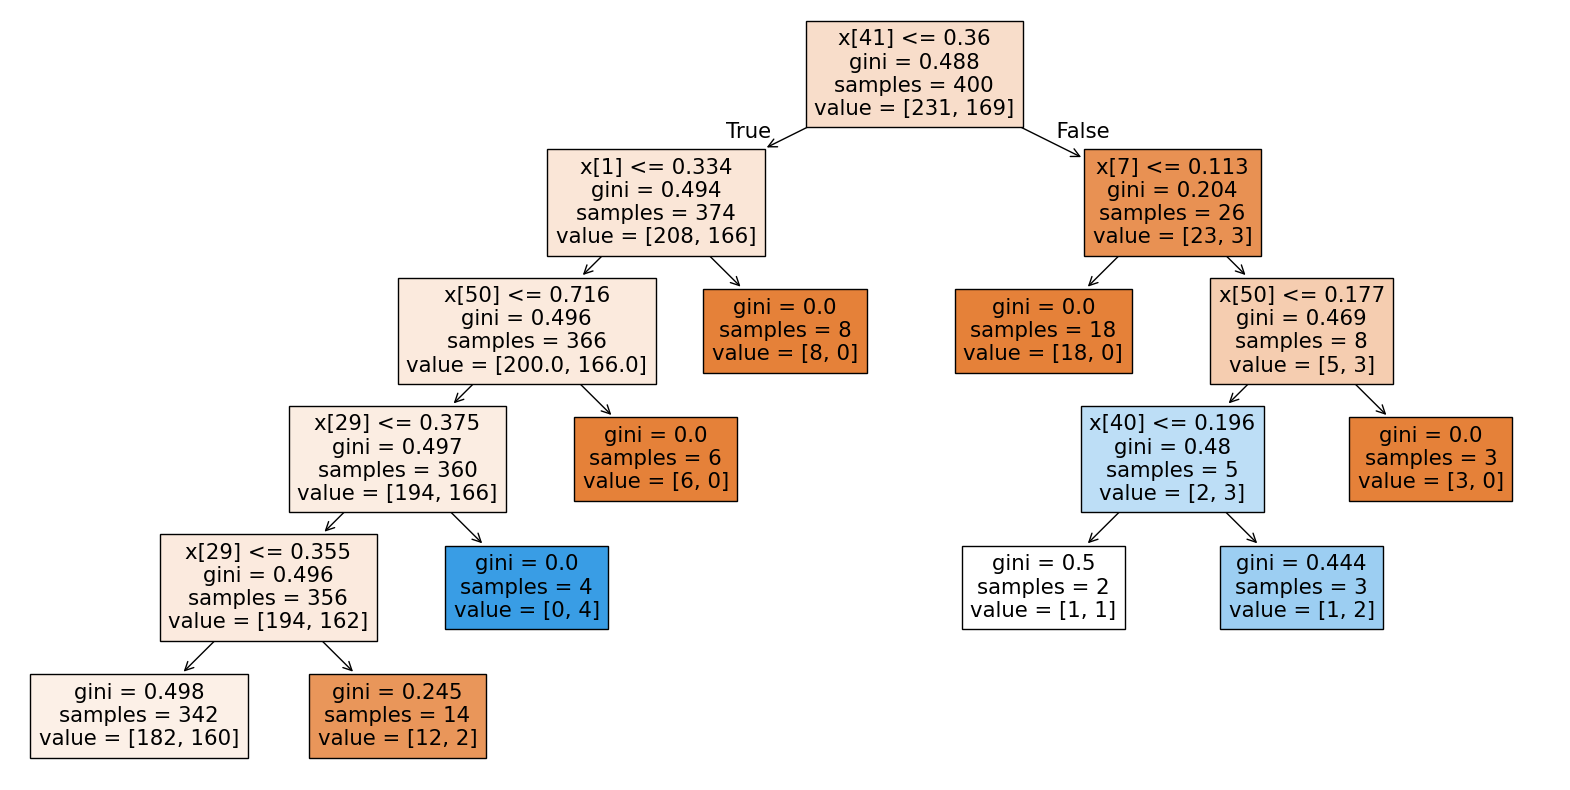

In [195]:
## Visualizing the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

In [196]:
y_pred = model.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [198]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.64

Confusion Matrix: 
 [[64  0]
 [36  0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        64
           1       0.00      0.00      0.00        36

    accuracy                           0.64       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.41      0.64      0.50       100



In [211]:
param = {
    'criterion': ['gini', 'entropy'],  # Retain only the two primary splitting criteria.
    'max_depth': [5, 10, 15, None],  # Limiting max depth but allowing 'None' for unconstrained growth.
    'min_samples_split': [2, 10, 20],  # Focus on reasonable values to control overfitting.
    'min_samples_leaf': [1, 5, 10],  # Controls the minimum size of leaf nodes.
    'max_features': ['sqrt', None],  # 'sqrt' for dimensionality reduction; 'None' for all features.
    'max_leaf_nodes': [None, 20, 50],  # Optional to constrain the number of leaf nodes.
    'ccp_alpha': [0.0, 0.01],  # Regularization parameter to prune the tree.
}

In [212]:
param

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15, None],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5, 10],
 'max_features': ['sqrt', None],
 'max_leaf_nodes': [None, 20, 50],
 'ccp_alpha': [0.0, 0.01]}

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:
model = DecisionTreeClassifier()

In [215]:
grid_search = GridSearchCV(model, param_grid=param, cv=5, scoring='accuracy', n_jobs=-1)

In [216]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', None],
                         'max_leaf_nodes': [None, 20, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [217]:
grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [218]:
grid_search.best_score_

np.float64(0.5874999999999999)

In [219]:
y_pred = grid_search.predict(X_test)

In [220]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [221]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.64

Confusion Matrix: 
 [[64  0]
 [36  0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        64
           1       0.00      0.00      0.00        36

    accuracy                           0.64       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.41      0.64      0.50       100



In [ ]:
import pickle
from sklearn.tree import DecisionTreeClassifier

# Assuming `X_train` and `y_train` are the training data and labels
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save the model
with open("sentiment_analysis_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `vectorizer` is your trained TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)